In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from utils.useful_tool import convert_polar_df, fetch_freezing_frames

In [2]:
intervals = ['1h', '6h']
polar_dfs = None

for interval in intervals:
    for animal_number in range(1, 5):
        filepath = './resources/extinction/dlc/60min_x1_%s_EXT_%d.csv' % (interval, animal_number)
        df = pd.read_csv(filepath, header=[1, 2], index_col=[0])

        bodyparts = list(set([body for (body, _) in df.columns]))
        drop_columns = [(body_name, 'likelihood') for body_name in bodyparts]
        df.drop(drop_columns, axis=1, inplace=True)

        xy_df = pd.read_csv('./resources/extinction/dlc/60min_x1_%s_EXT_%d_XY.tsv' % (interval, animal_number), sep="\t", header=[34], index_col=[0])
        freezing_series = fetch_freezing_frames(xy_df)

        polar_df = convert_polar_df(df, xy_df)
        polar_df = polar_df.apply(lambda x: (x - x.mean()) / x.std())
        
        freezing_index = freezing_series[freezing_series == 1].index
        freezing_df = polar_df.iloc[freezing_index, :]

        if polar_dfs is None:
            polar_dfs = freezing_df.copy(deep=True)
        else:
            polar_dfs = pd.concat([polar_dfs, freezing_df.copy(deep=True)])

In [3]:
polar_dfs

bodyparts      nose             leftear            rightear            \
coords     distance     theta  distance     theta  distance     theta   
1          0.696176 -1.864340  0.706776  1.149453 -0.561859  1.397964   
2          0.629551 -1.837609  0.591426  1.166265 -0.649141  1.420906   
3          0.571614 -1.841904  0.533986  1.140497 -0.744720  1.391328   
4          0.587040 -1.847379  0.789662  1.225774 -0.686432  1.404708   
5          0.712730 -1.842277  0.909617  1.243616 -0.539556  1.420167   
...             ...       ...       ...       ...       ...       ...   
7185      -0.697973  0.331389 -1.854110 -0.110105 -2.018182  0.415648   
7186      -0.773682  0.338429 -1.888897 -0.112303 -2.009313  0.418546   
7187      -0.716862  0.331390 -1.853122 -0.115344 -1.976158  0.406500   
7188      -0.794639  0.333052 -1.842453 -0.129662 -2.012321  0.394268   
7189      -0.800076  0.340777 -1.809392 -0.122837 -1.979518  0.402561   

bodyparts      neck               body1            ...     tail1            \
coords     distance     theta  distance     theta  ...  distance     theta   
1         -0.078462  1.135936 -0.310176  0.865914  ...  0.173442 -0.210717   
2         -0.127044  1.164392 -0.345410  0.902963  ...  0.199736 -0.213896   
3         -0.134747  1.127074 -0.318903  0.841999  ...  0.028930 -0.204101   
4         -0.089280  1.149278 -0.269479  0.868159  ...  0.018204 -0.201215   
5          0.021454  1.175469 -0.192432  0.915577  ... -0.083787 -0.220422   
...             ...       ...       ...       ...  ...       ...       ...   
7185      -1.923676  0.094705 -1.895984 -0.172857  ...  1.331920 -1.310182   
7186      -1.919044  0.101961 -1.889922 -0.148536  ...  0.846477 -1.304322   
7187      -1.878150  0.098193 -1.831869 -0.134043  ...  0.848172 -1.306939   
7188      -1.916497  0.079851 -1.847017 -0.162166  ...  0.859428 -1.307762   
7189      -1.836897  0.086562 -1.778641 -0.133378  ...  0.811937 -1.309069   

bodyparts     tail2               tail3               tail4            \
coords     distance     theta  distance     theta  distance     theta   
1          0.055407 -0.347504  0.184699 -0.582419 -0.169963 -0.847897   
2          0.041358 -0.349700  0.189431 -0.582851 -0.177869 -0.844174   
3         -0.053563 -0.345525  0.138281 -0.582508 -0.204445 -0.844194   
4         -0.075707 -0.344337  0.134820 -0.580871 -0.207640 -0.843750   
5         -0.123105 -0.356574  0.129113 -0.588836 -0.206233 -0.849633   
...             ...       ...       ...       ...       ...       ...   
7185       0.627486 -1.400951  0.457541 -1.503706 -0.027647  1.844053   
7186       0.586650 -1.399815  0.428758 -1.500875 -0.042234  1.846027   
7187       0.620183 -1.400379  0.454618 -1.503918 -0.035988  1.841040   
7188       0.616284 -1.399633  0.458544 -1.503841 -0.027243  1.839675   
7189       0.592354 -1.400070  0.457758 -1.503427 -0.011832  1.842115   

bodyparts               NaN                
coords    distance_by_frame area_by_frame  
1                 -0.449737      1.393742  
2                 -0.449737      1.332554  
3                 -0.528614      1.230574  
4                 -0.528614      1.210178  
5                 -0.528614      1.189782  
...                     ...           ...  
7185              -0.526955      0.428858  
7186              -0.635958      0.244180  
7187              -0.635958      0.391923  
7188              -0.635958      0.382689  
7189              -0.635958      0.595069  

[15517 rows x 26 columns]

[[-52.3428     -9.486549 ]
 [-52.344852   -9.4867115]
 [-52.344437   -9.497194 ]
 ...
 [ 57.139275   76.54859  ]
 [ 57.13723    76.550606 ]
 [ 57.14387    76.54741  ]]


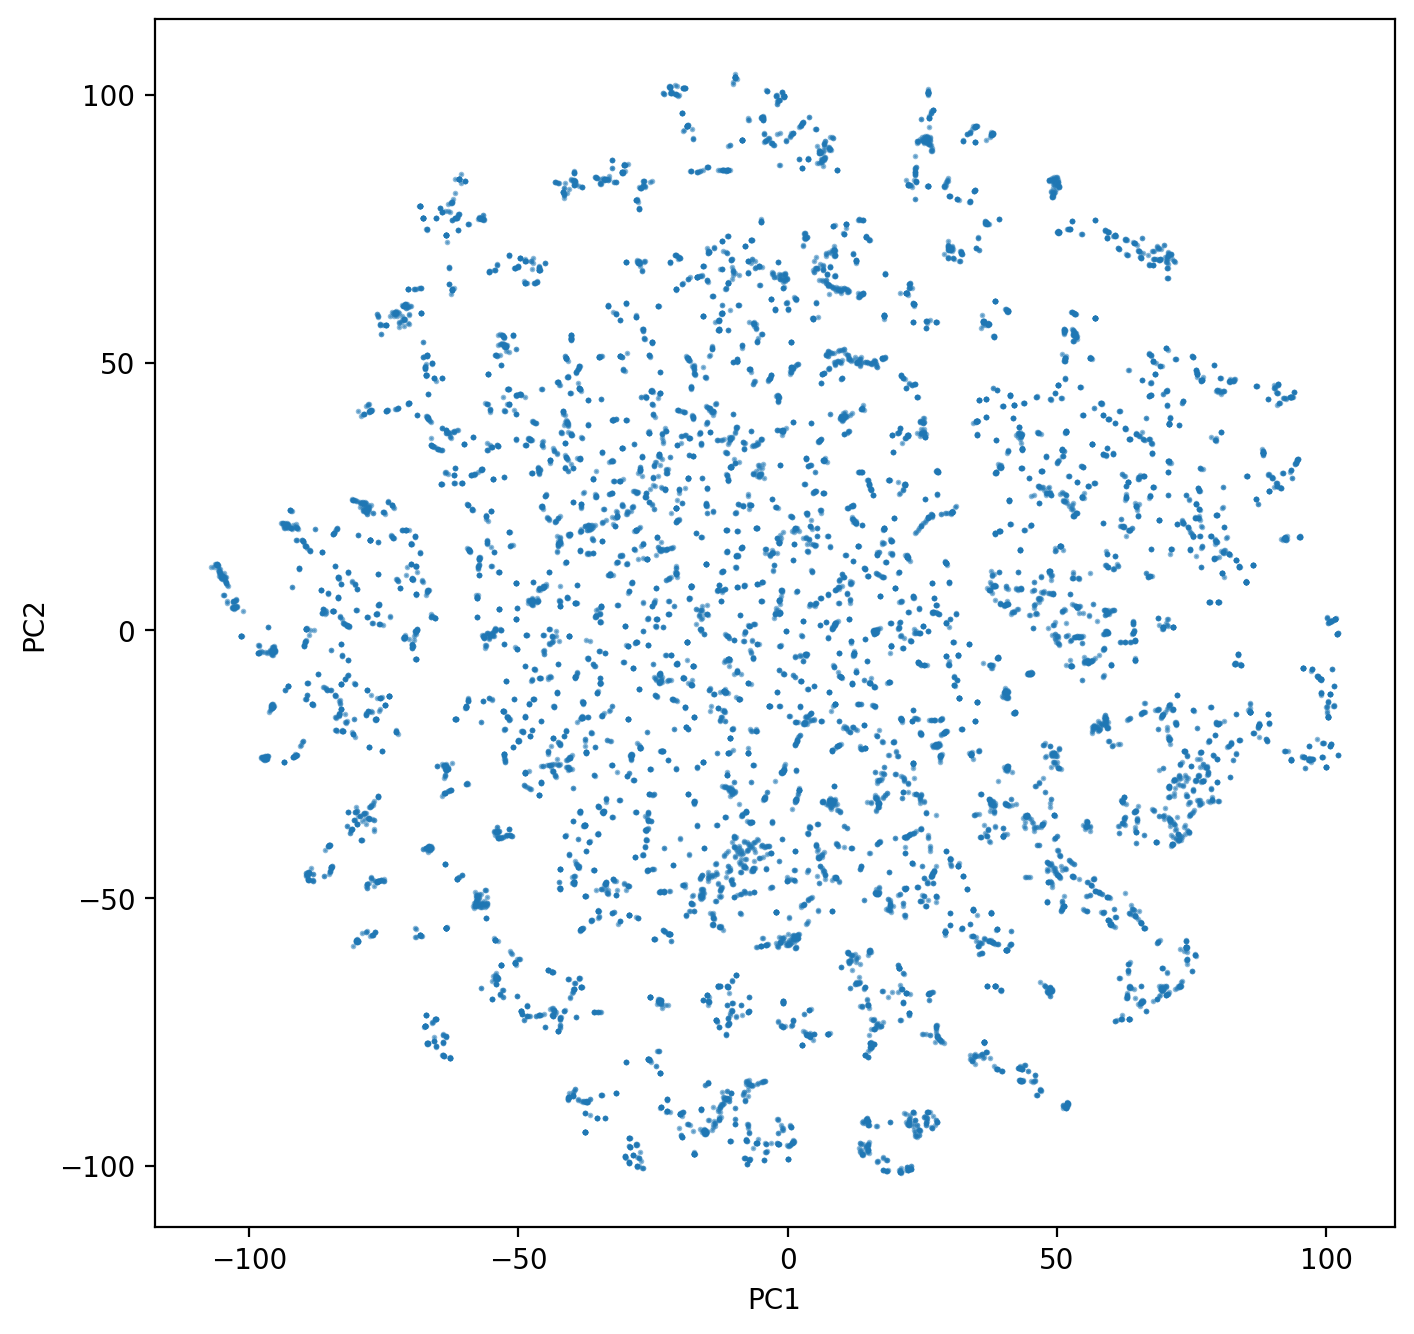

In [4]:
data = polar_dfs.to_numpy()
tsne = TSNE(n_components=2)
x_embedded = tsne.fit_transform(data)
print(x_embedded)

x, y = zip(*x_embedded)

plt.figure(figsize=(8, 8), dpi=200)
plt.scatter(x, y, alpha=0.5, s=1.0)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

[0.2688267  0.16883159 0.11148028 0.07885832 0.06836357 0.04652093
 0.03586835 0.03375268 0.03055809 0.02272597 0.022577   0.01769863
 0.01682951 0.01125447 0.01027156 0.00880947 0.00844076 0.00794322
 0.00698357 0.00585161 0.00488006 0.00418366 0.00332488 0.00259885
 0.00229467 0.00027161]
[[-1.02412367  1.25672958 -0.73525642 -0.49739925 -0.25550624  0.94901401]
 [-0.98073153  1.17768533 -0.8562099  -0.52528617 -0.15449518  0.9856892 ]
 [-0.85967253  0.96538039 -0.7629676  -0.37232071 -0.22114073  1.03267291]
 ...
 [ 0.48535849  0.72616464 -4.9988655  -0.24329567  1.62439663  0.01633154]
 [ 0.52717445  0.7179157  -5.03240955 -0.18440879  1.62285183  0.05776475]
 [ 0.45410626  0.74896933 -4.93821147 -0.23804675  1.6129023  -0.03308576]]
[[ 26.203514 -19.087933]
 [ 26.171415 -19.102812]
 [ 26.183014 -19.076921]
 ...
 [ -8.881669 -47.954796]
 [ -8.881107 -47.952976]
 [ -8.88212  -47.956863]]


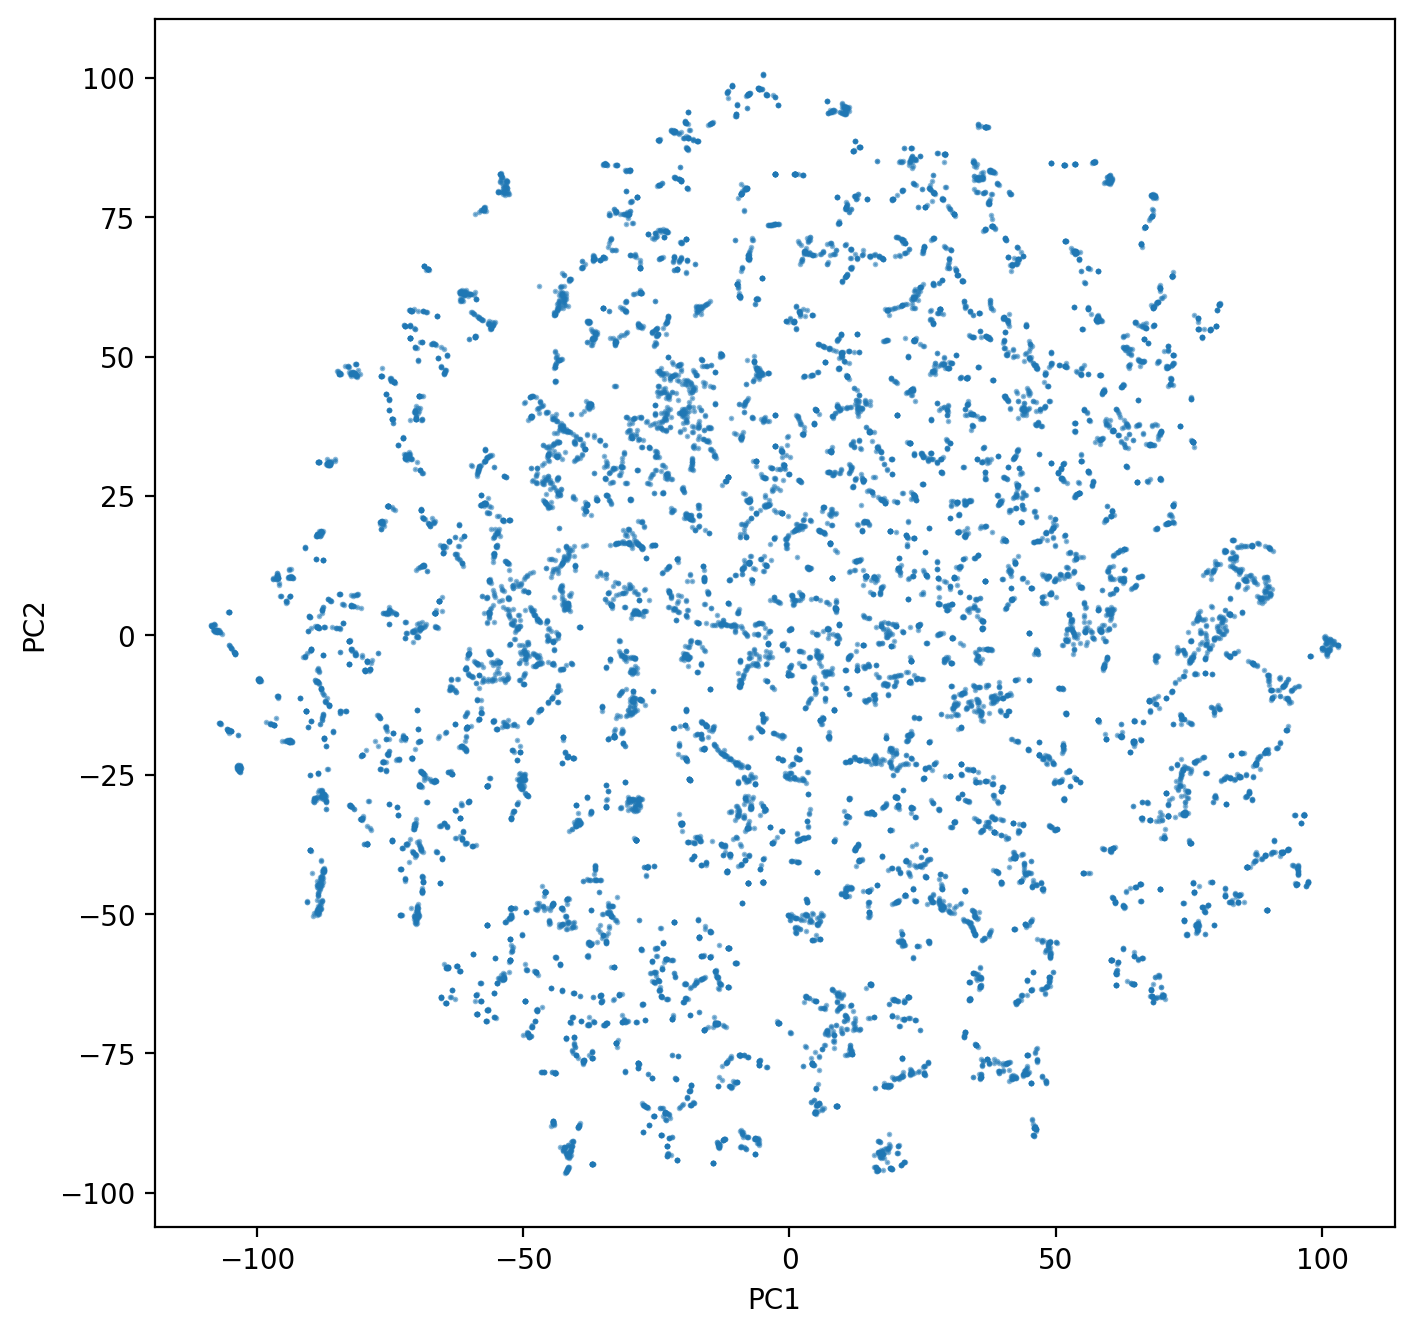

In [5]:
data = polar_dfs.to_numpy()
pca = PCA()
pca.fit(data)
feature = pca.transform(data)

print(pca.explained_variance_ratio_)

pca_list = feature[:, :6]
print(pca_list)
tsne = TSNE(n_components=2)
x_embedded = tsne.fit_transform(pca_list)
print(x_embedded)

x, y = zip(*x_embedded)

plt.figure(figsize=(8, 8), dpi=200)
plt.scatter(x, y, alpha=0.5, s=1.0)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [41]:
from sklearn import metrics
from sklearn.cluster import KMeans

scores = []
distortions = []
range_value = range(2, 40)
for n in range_value:
    kmeans_model = KMeans(n_clusters=n, random_state=0).fit(x_embedded)
    labels = kmeans_model.labels_
    score = metrics.calinski_harabasz_score(x_embedded, labels)
    scores.append(score)
    distortions.append(kmeans_model.inertia_)

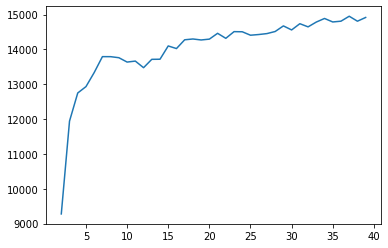

In [42]:
plt.plot(list(range_value), scores)
plt.show()

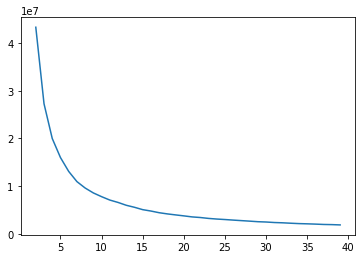

In [43]:
plt.plot(list(range_value), distortions)
plt.show()

In [44]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

def view_silhouette(km_pred):
    cluster_labels = np.unique(km_pred)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(x_embedded, km_pred, metric='euclidean')

    y_ax_lower, y_ax_upper= 0,0
    yticks = []

    for i,c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[km_pred==c]   # cluster_labelsには 0,1,2が入っている（enumerateなのでiにも0,1,2が入ってる（たまたま））
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
            color = cm.jet(float(i)/n_clusters)               # 色の値を作る
            plt.barh(range(y_ax_lower,y_ax_upper),            # 水平の棒グラフのを描画（底辺の範囲を指定）
                             c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                             height=1.0,                      # 棒の高さ
                             edgecolor='none',                # 棒の端の色
                             color=color)                     # 棒の色
            yticks.append((y_ax_lower+y_ax_upper)/2)          # クラスタラベルの表示位置を追加
            y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加

    silhouette_avg = np.mean(silhouette_vals)                 # シルエット係数の平均値
    plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
    plt.yticks(yticks,cluster_labels + 1)                     # クラスタレベルを表示
    plt.ylabel('Cluster')
    plt.xlabel('silhouette coefficient')
    plt.show()

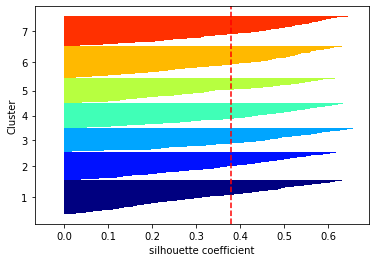

In [45]:
km_pred = KMeans(n_clusters=7, random_state=0).fit_predict(x_embedded)
view_silhouette(km_pred)


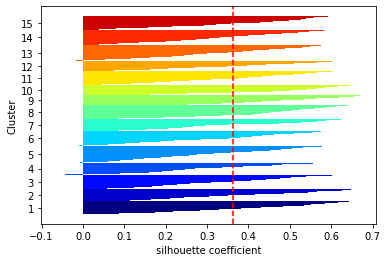

In [46]:
km_pred = KMeans(n_clusters=15, random_state=0).fit_predict(x_embedded)
view_silhouette(km_pred)

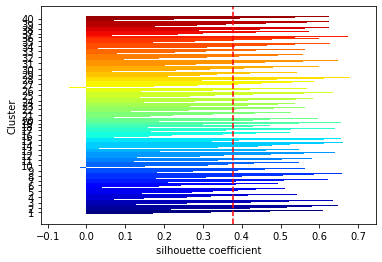

In [47]:
km_pred = KMeans(n_clusters=40, random_state=0).fit_predict(x_embedded)
view_silhouette(km_pred)

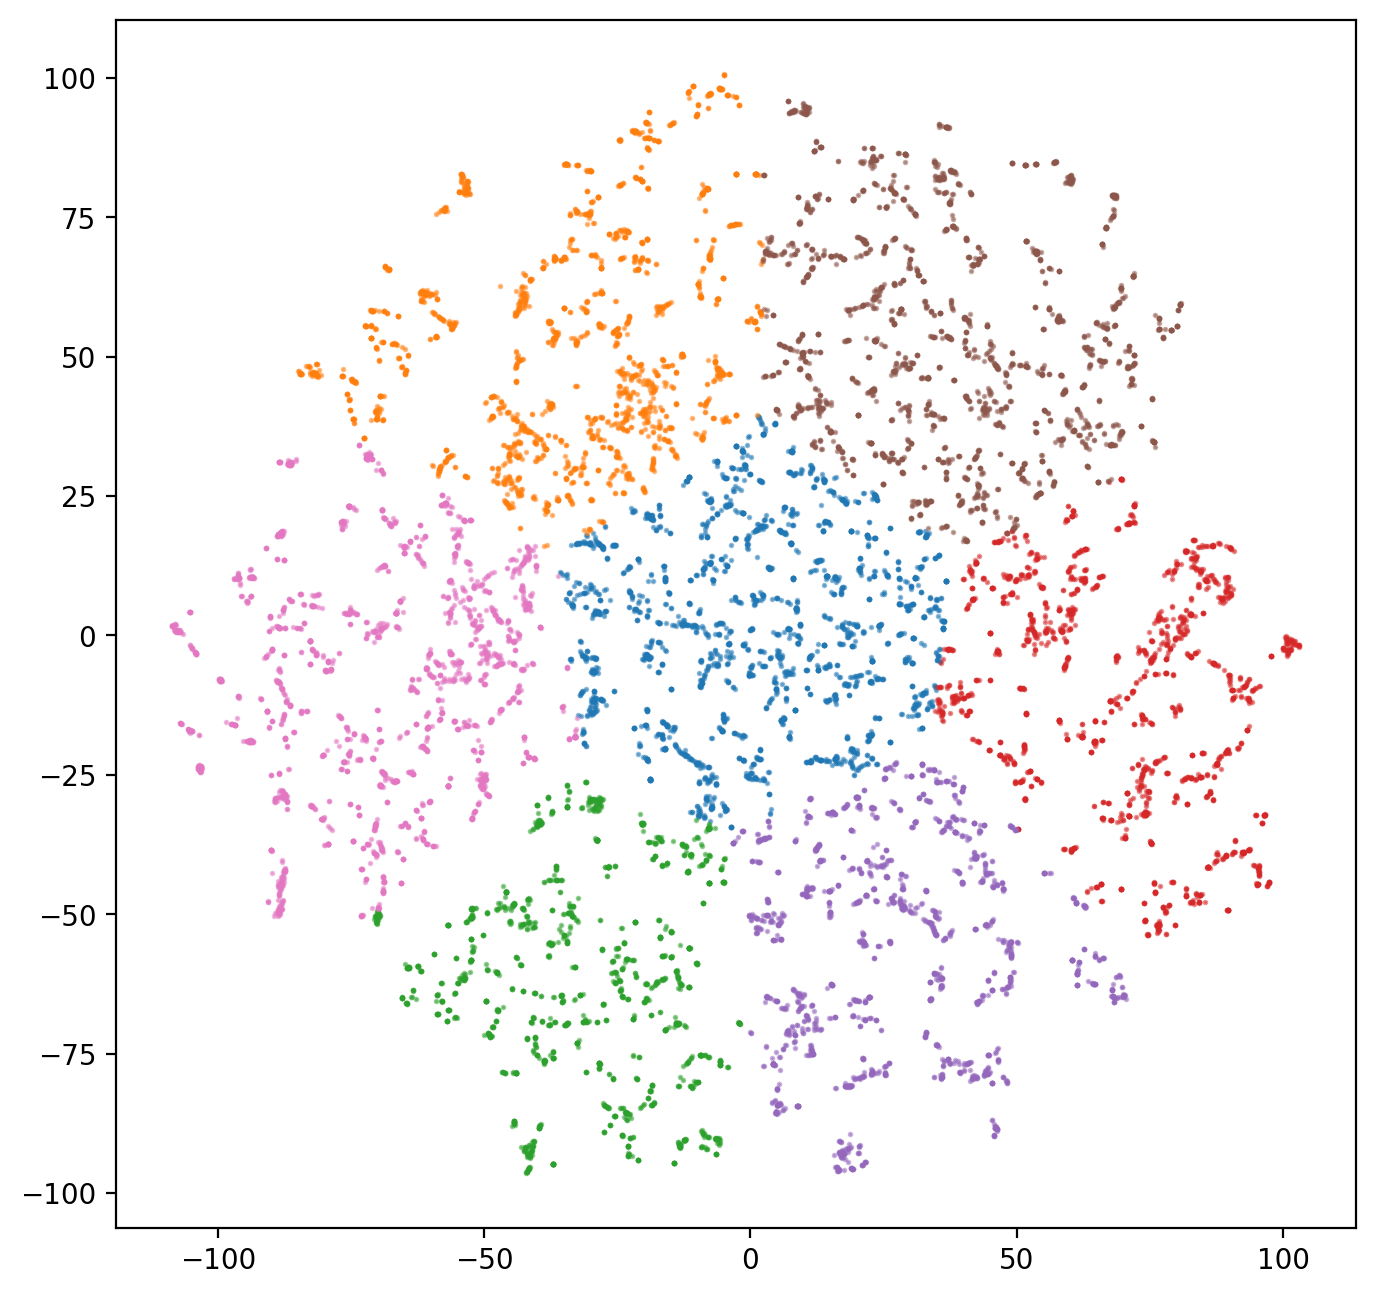

In [48]:
km = KMeans(n_clusters=7, random_state=0)
y_km = km.fit_predict(x_embedded)

plt.figure(figsize=(8, 8), dpi=200)
for n in range(7):
    plt.scatter(x_embedded[y_km==n,0],
                x_embedded[y_km==n,1],
                s=1.0,
                alpha=0.5,
                label='cluster%d' % (n + 1))
plt.show()

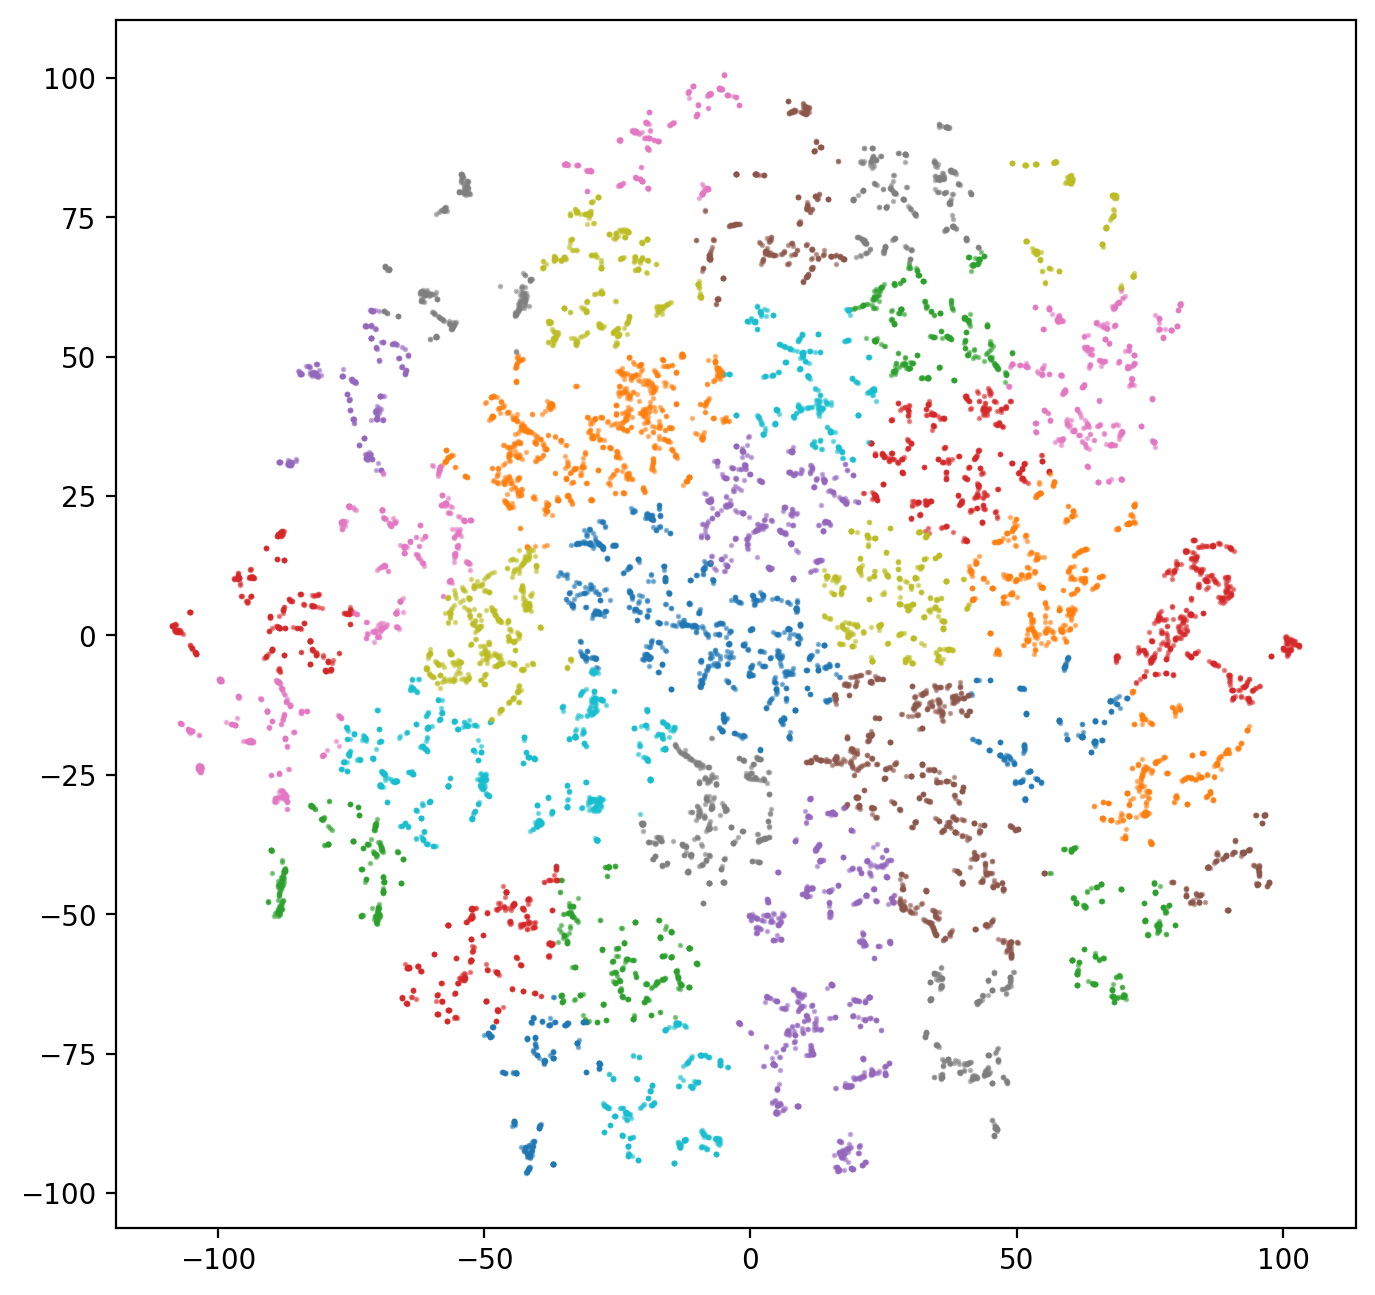

In [50]:
km = KMeans(n_clusters=40, random_state=0)
y_km = km.fit_predict(x_embedded)

plt.figure(figsize=(8, 8), dpi=200)
for n in range(40):
    plt.scatter(x_embedded[y_km==n,0],
                x_embedded[y_km==n,1],
                s=1.0,
                alpha=0.5,
                label='cluster%d' % (n + 1))
plt.show()